# Тема проекта "Ивенты игры PUBG: Battlegrounds"

# Описание проекта

Необходимо изучить ивентные события из игры **Pubg**

# Цели и задачи проекта

**Цель проекта:**  
получить практические навыки самостоятельной работы над кейсом.  
анализ игровых сессий игроков.

**Задачи проекта:**  
* изучить ивентное время
* изучить среднию продолжительность сессии
* Изучить общее кол-во игровых сессий

# Предобработка данных

## 1. Загрузка файла с данными и изучение общей информации

In [142]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

In [148]:
df = pd.read_csv('pubg_events_loggamestateperiodic.csv')

In [149]:
df.head()

,area,beforeendmatch_intminutes,beforeendmatch_intseconds,beforeendmatch_seconds,bluezonecustomoptions,cameraviewbehaviour,common_isgame,completion_match,dateid,duration,...,seasonstate,sincestartmatch_intminutes,sincestartmatch_intseconds,sincestartmatch_seconds,start_date,teamsize,tstp,type,weatherid,partition_0
0,pc-na,28,1691,1691.927,[[]],FpsOnly,0.1,0.587199,20190127,1703,...,progress,0,12,12.073,"""2019-01-25 21:42:41""",1,"""2019-01-25 21:42:53.073""",related,Clear,20190127
1,pc-na,28,1681,1681.953,[[]],FpsOnly,0.1,1.174398,20190127,1703,...,progress,0,22,22.047,"""2019-01-25 21:42:41""",1,"""2019-01-25 21:43:03.047""",related,Clear,20190127
2,pc-na,27,1671,1671.934,[[]],FpsOnly,0.1,1.761597,20190127,1703,...,progress,0,32,32.066,"""2019-01-25 21:42:41""",1,"""2019-01-25 21:43:13.066""",related,Clear,20190127
3,pc-na,27,1661,1661.959,[[]],FpsOnly,0.1,2.348796,20190127,1703,...,progress,0,42,42.041,"""2019-01-25 21:42:41""",1,"""2019-01-25 21:43:23.041""",related,Clear,20190127
4,pc-na,27,1651,1651.939,[[]],FpsOnly,0.1,2.877275,20190127,1703,...,progress,0,52,52.061,"""2019-01-25 21:42:41""",1,"""2019-01-25 21:43:33.061""",related,Clear,20190127


In [150]:
df.tail()

,area,beforeendmatch_intminutes,beforeendmatch_intseconds,beforeendmatch_seconds,bluezonecustomoptions,cameraviewbehaviour,common_isgame,completion_match,dateid,duration,...,seasonstate,sincestartmatch_intminutes,sincestartmatch_intseconds,sincestartmatch_seconds,start_date,teamsize,tstp,type,weatherid,partition_0
322854,pc-na,0,48,48.011,[[]],FpsAndTps,7.0,95.737705,20190127,1830,...,progress,29,1781,1781.989,"""2019-01-26 01:44:12""",1,"""2019-01-26 02:13:53.989""",related,Sunset,20190127
322855,pc-na,0,37,37.995,[[]],FpsAndTps,7.0,96.284153,20190127,1830,...,progress,29,1792,1792.005,"""2019-01-26 01:44:12""",1,"""2019-01-26 02:14:04.005""",related,Sunset,20190127
322856,pc-na,0,27,27.990,[[]],FpsAndTps,7.0,96.775956,20190127,1830,...,progress,30,1802,1802.010,"""2019-01-26 01:44:12""",1,"""2019-01-26 02:14:14.010""",related,Sunset,20190127
322857,pc-na,0,17,17.989,[[]],FpsAndTps,7.0,97.322404,20190127,1830,...,progress,30,1812,1812.011,"""2019-01-26 01:44:12""",1,"""2019-01-26 02:14:24.011""",related,Sunset,20190127
322858,pc-na,0,7,7.999,[[]],FpsAndTps,7.0,97.868852,20190127,1830,...,progress,30,1822,1822.001,"""2019-01-26 01:44:12""",1,"""2019-01-26 02:14:34.001""",related,Sunset,20190127


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322859 entries, 0 to 322858
Data columns (total 46 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   area                                  322859 non-null  object 
 1   beforeendmatch_intminutes             322859 non-null  int64  
 2   beforeendmatch_intseconds             322859 non-null  int64  
 3   beforeendmatch_seconds                322859 non-null  float64
 4   bluezonecustomoptions                 322859 non-null  object 
 5   cameraviewbehaviour                   322859 non-null  object 
 6   common_isgame                         322859 non-null  float64
 7   completion_match                      322859 non-null  float64
 8   dateid                                322859 non-null  int64  
 9   duration                              322859 non-null  int64  
 10  end_date                              322859 non-null  object 
 11  

In [152]:
df.describe()

,beforeendmatch_intminutes,beforeendmatch_intseconds,beforeendmatch_seconds,common_isgame,completion_match,dateid,duration,gamestate_elapsedtime,gamestate_numaliveplayers,gamestate_numaliveteams,...,gamestate_safetyzoneposition_y,gamestate_safetyzoneposition_z,gamestate_safetyzoneradius,nbr_players,part_playersalive,sincestartmatch_intminutes,sincestartmatch_intseconds,sincestartmatch_seconds,teamsize,partition_0
count,322859.000000,322859.000000,322859.000000,322859.000000,322859.000000,322859.0,322859.000000,322859.000000,322859.000000,322859.000000,...,322859.000000,322859.0,322859.000000,322859.000000,322859.000000,322859.000000,322859.000000,322859.000000,322859.000000,3.228590e+05
mean,13.566294,843.290021,843.802060,3.204868,49.207929,20190127.0,1694.217398,833.567938,38.338714,21.935833,...,295486.473386,0.0,183464.213782,95.849727,40.016475,13.736907,850.448316,850.935144,2.547765,2.019013e+07
std,8.452990,507.192087,507.192419,2.200768,28.325132,0.0,243.406626,499.210773,26.662570,18.815021,...,113520.481233,0.0,169283.134940,2.572373,27.811279,8.457538,507.287234,507.284233,1.281470,8.983170e-02
min,0.000000,0.000000,-0.771000,0.100000,0.454545,20190127.0,1170.000000,9.000000,0.000000,0.000000,...,16738.773438,0.0,0.002355,83.000000,0.000000,0.000000,10.000000,10.588000,1.000000,2.019013e+07
25%,6.000000,412.000000,412.215000,1.500000,24.636175,20190127.0,1407.000000,410.000000,16.000000,9.000000,...,208189.109375,0.0,44195.675781,94.000000,16.842105,7.000000,421.000000,421.308000,1.000000,2.019013e+07
50%,13.000000,824.000000,824.923000,2.500000,49.174917,20190127.0,1808.000000,815.000000,34.000000,17.000000,...,289436.875000,0.0,131090.531250,96.000000,35.106383,13.000000,831.000000,831.663000,2.000000,2.019013e+07
75%,20.000000,1237.000000,1237.761000,5.000000,73.750000,20190127.0,1886.000000,1221.000000,55.000000,28.000000,...,358223.187500,0.0,291219.156250,98.000000,57.731959,20.000000,1242.000000,1242.210000,4.000000,2.019013e+07
max,36.000000,2187.000000,2187.913000,10.500000,98.528273,20190127.0,2200.000000,2150.000000,100.000000,100.000000,...,740797.750000,0.0,579718.687500,100.000000,100.000000,36.000000,2192.000000,2192.093000,4.000000,2.019013e+07


In [153]:
df.columns.tolist()

['area',
 'beforeendmatch_intminutes',
 'beforeendmatch_intseconds',
 'beforeendmatch_seconds',
 'bluezonecustomoptions',
 'cameraviewbehaviour',
 'common_isgame',
 'completion_match',
 'dateid',
 'duration',
 'end_date',
 'gamestate_elapsedtime',
 'gamestate_numaliveplayers',
 'gamestate_numaliveteams',
 'gamestate_numjoinplayers',
 'gamestate_numstartplayers',
 'gamestate_poisongaswarningposition_x',
 'gamestate_poisongaswarningposition_y',
 'gamestate_poisongaswarningposition_z',
 'gamestate_poisongaswarningradius',
 'gamestate_redzoneposition_x',
 'gamestate_redzoneposition_y',
 'gamestate_redzoneposition_z',
 'gamestate_redzoneradius',
 'gamestate_safetyzoneposition_x',
 'gamestate_safetyzoneposition_y',
 'gamestate_safetyzoneposition_z',
 'gamestate_safetyzoneradius',
 'iscustomgame',
 'iseventmode',
 'mapname',
 'matchid',
 'mode',
 'nbr_players',
 'part_playersalive',
 'pingquality',
 'seasonstate',
 'sincestartmatch_intminutes',
 'sincestartmatch_intseconds',
 'sincestartmatch

### **Выводы**

Всего 322859 строк, 46 колонн.
Узнали количество строк в столбце - count, среднее значение столбца - mean, столбец стандартное отклонение - std, минимальные (min) и максимальные (max) значения, а также границу каждого квартиля - 25%, 50% и 75%.

## 2. Изучение пропущенных значений

In [159]:
df.isnull()

,area,beforeendmatch_intminutes,beforeendmatch_intseconds,beforeendmatch_seconds,bluezonecustomoptions,cameraviewbehaviour,common_isgame,completion_match,dateid,duration,...,seasonstate,sincestartmatch_intminutes,sincestartmatch_intseconds,sincestartmatch_seconds,start_date,teamsize,tstp,type,weatherid,partition_0
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
322855,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
322856,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
322857,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [214]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print(" ")

area
False    322859
Name: count, dtype: int64
 
beforeendmatch_intminutes
False    322859
Name: count, dtype: int64
 
beforeendmatch_intseconds
False    322859
Name: count, dtype: int64
 
beforeendmatch_seconds
False    322859
Name: count, dtype: int64
 
bluezonecustomoptions
False    322859
Name: count, dtype: int64
 
cameraviewbehaviour
False    322859
Name: count, dtype: int64
 
common_isgame
False    322859
Name: count, dtype: int64
 
completion_match
False    322859
Name: count, dtype: int64
 
dateid
False    322859
Name: count, dtype: int64
 
duration
False    322859
Name: count, dtype: int64
 
end_date
False    322859
Name: count, dtype: int64
 
gamestate_elapsedtime
False    322859
Name: count, dtype: int64
 
gamestate_numaliveplayers
False    322859
Name: count, dtype: int64
 
gamestate_numaliveteams
False    322859
Name: count, dtype: int64
 
gamestate_numjoinplayers
False    322859
Name: count, dtype: int64
 
gamestate_numstartplayers
False    322859
Name: count, dtype: int

In [216]:
df.isnull().sum()

area                                    0
beforeendmatch_intminutes               0
beforeendmatch_intseconds               0
beforeendmatch_seconds                  0
bluezonecustomoptions                   0
cameraviewbehaviour                     0
common_isgame                           0
completion_match                        0
dateid                                  0
duration                                0
end_date                                0
gamestate_elapsedtime                   0
gamestate_numaliveplayers               0
gamestate_numaliveteams                 0
gamestate_numjoinplayers                0
gamestate_numstartplayers               0
gamestate_poisongaswarningposition_x    0
gamestate_poisongaswarningposition_y    0
gamestate_poisongaswarningposition_z    0
gamestate_poisongaswarningradius        0
gamestate_redzoneposition_x             0
gamestate_redzoneposition_y             0
gamestate_redzoneposition_z             0
gamestate_redzoneradius           

In [161]:
df.describe(include = "all")

,area,beforeendmatch_intminutes,beforeendmatch_intseconds,beforeendmatch_seconds,bluezonecustomoptions,cameraviewbehaviour,common_isgame,completion_match,dateid,duration,...,seasonstate,sincestartmatch_intminutes,sincestartmatch_intseconds,sincestartmatch_seconds,start_date,teamsize,tstp,type,weatherid,partition_0
count,322859,322859.000000,322859.000000,322859.000000,322859,322859,322859.000000,322859.000000,322859.0,322859.000000,...,322859,322859.000000,322859.000000,322859.000000,322859,322859.000000,322859,322859,322859,3.228590e+05
unique,1,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,1088,NaN,179644,2,7,NaN
top,pc-na,NaN,NaN,NaN,[[]],FpsOnly,NaN,NaN,NaN,NaN,...,progress,NaN,NaN,NaN,"""2019-01-26 16:45:37""",NaN,"""2019-01-25 02:02:55.448""",related,Clear,NaN
freq,322859,NaN,NaN,NaN,322859,179274,NaN,NaN,NaN,NaN,...,322859,NaN,NaN,NaN,784,NaN,6,301874,154466,NaN
mean,NaN,13.566294,843.290021,843.802060,NaN,NaN,3.204868,49.207929,20190127.0,1694.217398,...,NaN,13.736907,850.448316,850.935144,NaN,2.547765,NaN,NaN,NaN,2.019013e+07
std,NaN,8.452990,507.192087,507.192419,NaN,NaN,2.200768,28.325132,0.0,243.406626,...,NaN,8.457538,507.287234,507.284233,NaN,1.281470,NaN,NaN,NaN,8.983170e-02
min,NaN,0.000000,0.000000,-0.771000,NaN,NaN,0.100000,0.454545,20190127.0,1170.000000,...,NaN,0.000000,10.000000,10.588000,NaN,1.000000,NaN,NaN,NaN,2.019013e+07
25%,NaN,6.000000,412.000000,412.215000,NaN,NaN,1.500000,24.636175,20190127.0,1407.000000,...,NaN,7.000000,421.000000,421.308000,NaN,1.000000,NaN,NaN,NaN,2.019013e+07
50%,NaN,13.000000,824.000000,824.923000,NaN,NaN,2.500000,49.174917,20190127.0,1808.000000,...,NaN,13.000000,831.000000,831.663000,NaN,2.000000,NaN,NaN,NaN,2.019013e+07
75%,NaN,20.000000,1237.000000,1237.761000,NaN,NaN,5.000000,73.750000,20190127.0,1886.000000,...,NaN,20.000000,1242.000000,1242.210000,NaN,4.000000,NaN,NaN,NaN,2.019013e+07


In [195]:
df = df.fillna('0')
df = df.fillna(0)

In [196]:
df.describe(include="all")

,area,beforeendmatch_intminutes,beforeendmatch_intseconds,beforeendmatch_seconds,bluezonecustomoptions,cameraviewbehaviour,common_isgame,completion_match,dateid,duration,...,seasonstate,sincestartmatch_intminutes,sincestartmatch_intseconds,sincestartmatch_seconds,start_date,teamsize,tstp,type,weatherid,partition_0
count,322859,322859.000000,322859.000000,322859.000000,322859,322859,322859.000000,322859.000000,322859.0,322859.000000,...,322859,322859.000000,322859.000000,322859.000000,322859,322859.000000,322859,322859,322859,3.228590e+05
unique,1,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,1088,NaN,179644,2,7,NaN
top,pc-na,NaN,NaN,NaN,[[]],FpsOnly,NaN,NaN,NaN,NaN,...,progress,NaN,NaN,NaN,"""2019-01-26 16:45:37""",NaN,"""2019-01-25 02:02:55.448""",related,Clear,NaN
freq,322859,NaN,NaN,NaN,322859,179274,NaN,NaN,NaN,NaN,...,322859,NaN,NaN,NaN,784,NaN,6,301874,154466,NaN
mean,NaN,13.566294,843.290021,843.802060,NaN,NaN,3.204868,49.207929,20190127.0,1694.217398,...,NaN,13.736907,850.448316,850.935144,NaN,2.547765,NaN,NaN,NaN,2.019013e+07
std,NaN,8.452990,507.192087,507.192419,NaN,NaN,2.200768,28.325132,0.0,243.406626,...,NaN,8.457538,507.287234,507.284233,NaN,1.281470,NaN,NaN,NaN,8.983170e-02
min,NaN,0.000000,0.000000,-0.771000,NaN,NaN,0.100000,0.454545,20190127.0,1170.000000,...,NaN,0.000000,10.000000,10.588000,NaN,1.000000,NaN,NaN,NaN,2.019013e+07
25%,NaN,6.000000,412.000000,412.215000,NaN,NaN,1.500000,24.636175,20190127.0,1407.000000,...,NaN,7.000000,421.000000,421.308000,NaN,1.000000,NaN,NaN,NaN,2.019013e+07
50%,NaN,13.000000,824.000000,824.923000,NaN,NaN,2.500000,49.174917,20190127.0,1808.000000,...,NaN,13.000000,831.000000,831.663000,NaN,2.000000,NaN,NaN,NaN,2.019013e+07
75%,NaN,20.000000,1237.000000,1237.761000,NaN,NaN,5.000000,73.750000,20190127.0,1886.000000,...,NaN,20.000000,1242.000000,1242.210000,NaN,4.000000,NaN,NaN,NaN,2.019013e+07


## 3. Изменение типов данных

In [239]:
df.dtypes

area                                     object
beforeendmatch_intminutes                 int64
beforeendmatch_intseconds                 int64
beforeendmatch_seconds                  float64
bluezonecustomoptions                    object
cameraviewbehaviour                      object
common_isgame                           float64
completion_match                        float64
dateid                                    int64
duration                                  int64
end_date                                 object
gamestate_elapsedtime                     int64
gamestate_numaliveplayers                 int64
gamestate_numaliveteams                   int64
gamestate_numjoinplayers                  int64
gamestate_numstartplayers                 int64
gamestate_poisongaswarningposition_x    float64
gamestate_poisongaswarningposition_y    float64
gamestate_poisongaswarningposition_z      int64
gamestate_poisongaswarningradius        float64
gamestate_redzoneposition_x             

In [272]:
df['beforeendmatch_seconds'] = df['beforeendmatch_seconds'].astype(int)

df['common_isgame'] = df['common_isgame'].astype(int)

df['completion_match'] = df['completion_match'].astype(int)

df['teamsize'] = df['teamsize'].astype(float)

In [274]:
df.dtypes

area                                     object
beforeendmatch_intminutes                 int64
beforeendmatch_intseconds                 int64
beforeendmatch_seconds                    int32
bluezonecustomoptions                    object
cameraviewbehaviour                      object
common_isgame                             int32
completion_match                          int32
dateid                                    int64
duration                                  int64
end_date                                 object
gamestate_elapsedtime                     int64
gamestate_numaliveplayers                 int64
gamestate_numaliveteams                   int64
gamestate_numjoinplayers                  int64
gamestate_numstartplayers                 int64
gamestate_poisongaswarningposition_x    float64
gamestate_poisongaswarningposition_y    float64
gamestate_poisongaswarningposition_z      int64
gamestate_poisongaswarningradius        float64
gamestate_redzoneposition_x             

## 4. Поиск дубликатов

In [283]:
duplicate_rows = df[df.duplicated()]

num_duplicates = duplicate_rows.shape[0]

In [284]:
num_duplicates

141112

## 5. Выводы к разделу 1

Узнали о кол-ве занимаемой память, о объектах, о кол-ве строк, столбцов.  
Узнали что значения Nan отсутсвуют.  
Произвели изменение определённого кол-ва типов данных.  
Посчитали кол-во дубликатов.

# Исследовательский анализ данных

## 1. Индексация (по координатам, логическая)

In [293]:
df.iloc[0, 1]

28

In [297]:
df.loc[3, 'teamsize']

1.0

In [301]:
df[df['beforeendmatch_intseconds'] > 10]

,area,beforeendmatch_intminutes,beforeendmatch_intseconds,beforeendmatch_seconds,bluezonecustomoptions,cameraviewbehaviour,common_isgame,completion_match,dateid,duration,...,seasonstate,sincestartmatch_intminutes,sincestartmatch_intseconds,sincestartmatch_seconds,start_date,teamsize,tstp,type,weatherid,partition_0
0,pc-na,28,1691,1691,[[]],FpsOnly,0,0,20190127,1703,...,progress,0,12,12.073,"""2019-01-25 21:42:41""",1.0,"""2019-01-25 21:42:53.073""",related,Clear,20190127
1,pc-na,28,1681,1681,[[]],FpsOnly,0,1,20190127,1703,...,progress,0,22,22.047,"""2019-01-25 21:42:41""",1.0,"""2019-01-25 21:43:03.047""",related,Clear,20190127
2,pc-na,27,1671,1671,[[]],FpsOnly,0,1,20190127,1703,...,progress,0,32,32.066,"""2019-01-25 21:42:41""",1.0,"""2019-01-25 21:43:13.066""",related,Clear,20190127
3,pc-na,27,1661,1661,[[]],FpsOnly,0,2,20190127,1703,...,progress,0,42,42.041,"""2019-01-25 21:42:41""",1.0,"""2019-01-25 21:43:23.041""",related,Clear,20190127
4,pc-na,27,1651,1651,[[]],FpsOnly,0,2,20190127,1703,...,progress,0,52,52.061,"""2019-01-25 21:42:41""",1.0,"""2019-01-25 21:43:33.061""",related,Clear,20190127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322853,pc-na,0,57,57,[[]],FpsAndTps,7,95,20190127,1830,...,progress,29,1772,1772.012,"""2019-01-26 01:44:12""",1.0,"""2019-01-26 02:13:44.012""",related,Sunset,20190127
322854,pc-na,0,48,48,[[]],FpsAndTps,7,95,20190127,1830,...,progress,29,1781,1781.989,"""2019-01-26 01:44:12""",1.0,"""2019-01-26 02:13:53.989""",related,Sunset,20190127
322855,pc-na,0,37,37,[[]],FpsAndTps,7,96,20190127,1830,...,progress,29,1792,1792.005,"""2019-01-26 01:44:12""",1.0,"""2019-01-26 02:14:04.005""",related,Sunset,20190127
322856,pc-na,0,27,27,[[]],FpsAndTps,7,96,20190127,1830,...,progress,30,1802,1802.010,"""2019-01-26 01:44:12""",1.0,"""2019-01-26 02:14:14.010""",related,Sunset,20190127


## 2. Сортировка данных

In [303]:
df.sort_values(by='beforeendmatch_intseconds')

,area,beforeendmatch_intminutes,beforeendmatch_intseconds,beforeendmatch_seconds,bluezonecustomoptions,cameraviewbehaviour,common_isgame,completion_match,dateid,duration,...,seasonstate,sincestartmatch_intminutes,sincestartmatch_intseconds,sincestartmatch_seconds,start_date,teamsize,tstp,type,weatherid,partition_0
116467,pc-na,0,0,0,[[]],FpsOnly,7,98,20190127,1772,...,progress,29,1772,1772.441,"""2019-01-26 02:39:23""",4.0,"""2019-01-26 03:08:55.441""",related,Overcast,20190127
209437,pc-na,0,0,0,[[]],FpsAndTps,6,98,20190127,1291,...,progress,21,1291,1291.113,"""2019-01-26 00:23:08""",2.0,"""2019-01-26 00:44:39.113""",sample,Clear,20190127
299142,pc-na,0,0,0,[[]],FpsAndTps,7,98,20190127,1341,...,progress,22,1340,1340.843,"""2019-01-20 22:58:50""",4.0,"""2019-01-20 23:21:10.843""",related,Clear,20190127
162072,pc-na,0,0,0,[[]],FpsOnly,7,98,20190127,1341,...,progress,22,1341,1341.300,"""2019-01-26 17:40:55""",1.0,"""2019-01-26 18:03:16.300""",related,Clear,20190127
257393,pc-na,0,0,0,[[]],FpsAndTps,8,98,20190127,1841,...,progress,30,1841,1841.928,"""2019-01-25 23:36:01""",2.0,"""2019-01-26 00:06:42.928""",sample,Snow,20190127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61044,pc-na,36,2175,2175,[[]],FpsAndTps,0,0,20190127,2187,...,progress,0,12,12.298,"""2019-01-27 00:09:03""",4.0,"""2019-01-27 00:09:15.298""",related,Sunrise,20190127
207418,pc-na,36,2177,2177,[[]],FpsAndTps,0,0,20190127,2200,...,progress,0,22,22.073,"""2019-01-17 21:47:56""",4.0,"""2019-01-17 21:48:18.073""",related,Sunset,20190127
260820,pc-na,36,2177,2177,[[]],FpsAndTps,0,0,20190127,2200,...,progress,0,22,22.073,"""2019-01-17 21:47:56""",4.0,"""2019-01-17 21:48:18.073""",related,Sunset,20190127
260819,pc-na,36,2187,2187,[[]],FpsAndTps,0,0,20190127,2200,...,progress,0,12,12.087,"""2019-01-17 21:47:56""",4.0,"""2019-01-17 21:48:08.087""",related,Sunset,20190127


In [305]:
df.sort_values(by='beforeendmatch_seconds', ascending=False)

,area,beforeendmatch_intminutes,beforeendmatch_intseconds,beforeendmatch_seconds,bluezonecustomoptions,cameraviewbehaviour,common_isgame,completion_match,dateid,duration,...,seasonstate,sincestartmatch_intminutes,sincestartmatch_intseconds,sincestartmatch_seconds,start_date,teamsize,tstp,type,weatherid,partition_0
260819,pc-na,36,2187,2187,[[]],FpsAndTps,0,0,20190127,2200,...,progress,0,12,12.087,"""2019-01-17 21:47:56""",4.0,"""2019-01-17 21:48:08.087""",related,Sunset,20190127
207417,pc-na,36,2187,2187,[[]],FpsAndTps,0,0,20190127,2200,...,progress,0,12,12.087,"""2019-01-17 21:47:56""",4.0,"""2019-01-17 21:48:08.087""",related,Sunset,20190127
260820,pc-na,36,2177,2177,[[]],FpsAndTps,0,0,20190127,2200,...,progress,0,22,22.073,"""2019-01-17 21:47:56""",4.0,"""2019-01-17 21:48:18.073""",related,Sunset,20190127
207418,pc-na,36,2177,2177,[[]],FpsAndTps,0,0,20190127,2200,...,progress,0,22,22.073,"""2019-01-17 21:47:56""",4.0,"""2019-01-17 21:48:18.073""",related,Sunset,20190127
61044,pc-na,36,2175,2175,[[]],FpsAndTps,0,0,20190127,2187,...,progress,0,12,12.298,"""2019-01-27 00:09:03""",4.0,"""2019-01-27 00:09:15.298""",related,Sunrise,20190127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252930,pc-na,0,0,0,[[]],FpsOnly,7,98,20190127,1382,...,progress,23,1381,1381.458,"""2019-01-21 18:03:15""",4.0,"""2019-01-21 18:26:16.458""",related,Clear,20190127
252792,pc-na,0,0,0,[[]],FpsOnly,8,98,20190127,1411,...,progress,23,1411,1411.373,"""2019-01-24 22:17:20""",1.0,"""2019-01-24 22:40:51.373""",related,Overcast,20190127
138818,pc-na,0,0,0,[[]],FpsAndTps,9,98,20190127,1902,...,progress,31,1903,1903.102,"""2019-01-26 00:20:56""",4.0,"""2019-01-26 00:52:39.102""",sample,Snow,20190127
251985,pc-na,0,0,0,[[]],FpsAndTps,7,98,20190127,1371,...,progress,22,1371,1371.908,"""2019-01-19 02:26:10""",1.0,"""2019-01-19 02:49:01.908""",related,Clear,20190127


In [307]:
df.sort_values(by=['common_isgame', 'dateid'], ascending=[True, False])

,area,beforeendmatch_intminutes,beforeendmatch_intseconds,beforeendmatch_seconds,bluezonecustomoptions,cameraviewbehaviour,common_isgame,completion_match,dateid,duration,...,seasonstate,sincestartmatch_intminutes,sincestartmatch_intseconds,sincestartmatch_seconds,start_date,teamsize,tstp,type,weatherid,partition_0
0,pc-na,28,1691,1691,[[]],FpsOnly,0,0,20190127,1703,...,progress,0,12,12.073,"""2019-01-25 21:42:41""",1.0,"""2019-01-25 21:42:53.073""",related,Clear,20190127
1,pc-na,28,1681,1681,[[]],FpsOnly,0,1,20190127,1703,...,progress,0,22,22.047,"""2019-01-25 21:42:41""",1.0,"""2019-01-25 21:43:03.047""",related,Clear,20190127
2,pc-na,27,1671,1671,[[]],FpsOnly,0,1,20190127,1703,...,progress,0,32,32.066,"""2019-01-25 21:42:41""",1.0,"""2019-01-25 21:43:13.066""",related,Clear,20190127
3,pc-na,27,1661,1661,[[]],FpsOnly,0,2,20190127,1703,...,progress,0,42,42.041,"""2019-01-25 21:42:41""",1.0,"""2019-01-25 21:43:23.041""",related,Clear,20190127
4,pc-na,27,1651,1651,[[]],FpsOnly,0,2,20190127,1703,...,progress,0,52,52.061,"""2019-01-25 21:42:41""",1.0,"""2019-01-25 21:43:33.061""",related,Clear,20190127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229678,pc-na,0,1,1,[[]],FpsOnly,10,98,20190127,1963,...,progress,32,1961,1961.489,"""2019-01-21 00:03:53""",4.0,"""2019-01-21 00:36:34.489""",related,Snow,20190127
262253,pc-na,0,7,7,[[]],FpsAndTps,10,97,20190127,2200,...,progress,36,2192,2192.093,"""2019-01-17 21:47:56""",4.0,"""2019-01-17 22:24:28.093""",related,Sunset,20190127
265493,pc-na,0,1,1,[[]],FpsOnly,10,98,20190127,1963,...,progress,32,1961,1961.489,"""2019-01-21 00:03:53""",4.0,"""2019-01-21 00:36:34.489""",related,Snow,20190127
272343,pc-na,0,1,1,[[]],FpsAndTps,10,98,20190127,1963,...,progress,32,1962,1962.079,"""2019-01-19 22:21:03""",1.0,"""2019-01-19 22:53:45.079""",related,Snow,20190127


## 3. Фильтрация данных

In [325]:
df[(df['dateid'] > 8) & (df['gamestate_numaliveteams'] == 45)]

,area,beforeendmatch_intminutes,beforeendmatch_intseconds,beforeendmatch_seconds,bluezonecustomoptions,cameraviewbehaviour,common_isgame,completion_match,dateid,duration,...,seasonstate,sincestartmatch_intminutes,sincestartmatch_intseconds,sincestartmatch_seconds,start_date,teamsize,tstp,type,weatherid,partition_0
181,pc-na,22,1323,1323,[[]],FpsAndTps,1,8,20190127,1445,...,progress,2,121,121.964,"""2019-01-26 03:07:05""",2.0,"""2019-01-26 03:09:06.964""",related,Clear,20190127
352,pc-na,18,1083,1083,[[]],FpsAndTps,1,25,20190127,1477,...,progress,6,393,393.158,"""2019-01-24 23:42:41""",1.0,"""2019-01-24 23:49:14.158""",related,Clear,20190126
847,pc-na,23,1381,1381,[[]],FpsAndTps,1,28,20190127,1943,...,progress,9,561,561.309,"""2019-01-13 23:47:13""",1.0,"""2019-01-13 23:56:34.309""",related,Snow,20190127
848,pc-na,22,1371,1371,[[]],FpsAndTps,1,28,20190127,1943,...,progress,9,571,571.327,"""2019-01-13 23:47:13""",1.0,"""2019-01-13 23:56:44.327""",related,Snow,20190127
849,pc-na,22,1361,1361,[[]],FpsAndTps,1,29,20190127,1943,...,progress,9,581,581.339,"""2019-01-13 23:47:13""",1.0,"""2019-01-13 23:56:54.339""",related,Snow,20190127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320244,pc-na,18,1090,1090,[[]],FpsAndTps,2,43,20190127,1971,...,progress,14,881,881.379,"""2019-01-26 05:59:28""",1.0,"""2019-01-26 06:14:09.379""",related,Dark,20190127
320516,pc-na,20,1256,1256,[[]],FpsAndTps,1,8,20190127,1377,...,progress,2,121,121.305,"""2019-01-21 22:19:43""",2.0,"""2019-01-21 22:21:44.305""",related,Clear,20190127
321705,pc-na,28,1731,1731,[[]],FpsAndTps,1,10,20190127,1952,...,progress,3,221,221.803,"""2019-01-26 04:17:21""",2.0,"""2019-01-26 04:21:02.803""",related,Clear,20190127
321706,pc-na,28,1721,1721,[[]],FpsAndTps,1,11,20190127,1952,...,progress,3,231,231.804,"""2019-01-26 04:17:21""",2.0,"""2019-01-26 04:21:12.804""",related,Clear,20190127


In [335]:
df[df['gamestate_numaliveplayers'].isin([32, 56, 78])]

,area,beforeendmatch_intminutes,beforeendmatch_intseconds,beforeendmatch_seconds,bluezonecustomoptions,cameraviewbehaviour,common_isgame,completion_match,dateid,duration,...,seasonstate,sincestartmatch_intminutes,sincestartmatch_intseconds,sincestartmatch_seconds,start_date,teamsize,tstp,type,weatherid,partition_0
32,pc-na,22,1371,1371,[[]],FpsOnly,1,18,20190127,1703,...,progress,5,332,332.075,"""2019-01-25 21:42:41""",1.0,"""2019-01-25 21:48:13.075""",related,Clear,20190127
33,pc-na,22,1361,1361,[[]],FpsOnly,1,19,20190127,1703,...,progress,5,342,342.087,"""2019-01-25 21:42:41""",1.0,"""2019-01-25 21:48:23.087""",related,Clear,20190127
34,pc-na,22,1351,1351,[[]],FpsOnly,1,19,20190127,1703,...,progress,5,352,352.052,"""2019-01-25 21:42:41""",1.0,"""2019-01-25 21:48:33.052""",related,Clear,20190127
64,pc-na,17,1051,1051,[[]],FpsOnly,1,37,20190127,1703,...,progress,10,652,652.034,"""2019-01-25 21:42:41""",1.0,"""2019-01-25 21:53:33.034""",related,Clear,20190127
65,pc-na,17,1041,1041,[[]],FpsOnly,1,37,20190127,1703,...,progress,11,662,662.056,"""2019-01-25 21:42:41""",1.0,"""2019-01-25 21:53:43.056""",related,Clear,20190127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322720,pc-na,23,1387,1387,[[]],FpsAndTps,1,23,20190127,1830,...,progress,7,442,442.013,"""2019-01-26 01:44:12""",1.0,"""2019-01-26 01:51:34.013""",related,Sunset,20190127
322799,pc-na,9,598,598,[[]],FpsAndTps,3,66,20190127,1830,...,progress,20,1231,1231.994,"""2019-01-26 01:44:12""",1.0,"""2019-01-26 02:04:43.994""",related,Sunset,20190127
322800,pc-na,9,587,587,[[]],FpsAndTps,3,66,20190127,1830,...,progress,20,1242,1242.025,"""2019-01-26 01:44:12""",1.0,"""2019-01-26 02:04:54.025""",related,Sunset,20190127
322801,pc-na,9,578,578,[[]],FpsAndTps,3,67,20190127,1830,...,progress,20,1251,1251.993,"""2019-01-26 01:44:12""",1.0,"""2019-01-26 02:05:03.993""",related,Sunset,20190127


## 4. Сводные таблицы

In [352]:
df.pivot_table(values='duration', index='gamestate_redzoneposition_x', aggfunc='mean')

,duration
gamestate_redzoneposition_x,
0.000000,1627.398337
40302.703125,1291.000000
42404.648438,1451.000000
43921.812500,1396.000000
44068.750000,1302.000000
...,...
665023.625000,1920.000000
665736.250000,1881.000000
667382.500000,1985.000000


In [355]:
df.pivot_table(values='duration', index='gamestate_redzoneposition_x', aggfunc=['mean', 'sum'])

,mean,sum
,duration,duration
gamestate_redzoneposition_x,,
0.000000,1627.398337,129599494
40302.703125,1291.000000,33566
42404.648438,1451.000000,18863
43921.812500,1396.000000,33504
44068.750000,1302.000000,33852
...,...,...
665023.625000,1920.000000,30720
665736.250000,1881.000000,30096


## 5. Группировка данных, агрегатные функции

In [363]:
df.groupby('gamestate_numstartplayers')

In [367]:
df['gamestate_safetyzoneradius'].agg(['sum', 'mean', 'count'])

sum      5.923307e+10
mean     1.834642e+05
count    3.228590e+05
Name: gamestate_safetyzoneradius, dtype: float64

In [369]:
df['sincestartmatch_seconds'].agg(['sum', 'mean', 'count', 'min', 'max'])

sum      2.747321e+08
mean     8.509351e+02
count    3.228590e+05
min      1.058800e+01
max      2.192093e+03
Name: sincestartmatch_seconds, dtype: float64

## 6. Поиск закономерностей, варианты решения бизнес-задачи

In [371]:
df.isnull().sum()

area                                    0
beforeendmatch_intminutes               0
beforeendmatch_intseconds               0
beforeendmatch_seconds                  0
bluezonecustomoptions                   0
cameraviewbehaviour                     0
common_isgame                           0
completion_match                        0
dateid                                  0
duration                                0
end_date                                0
gamestate_elapsedtime                   0
gamestate_numaliveplayers               0
gamestate_numaliveteams                 0
gamestate_numjoinplayers                0
gamestate_numstartplayers               0
gamestate_poisongaswarningposition_x    0
gamestate_poisongaswarningposition_y    0
gamestate_poisongaswarningposition_z    0
gamestate_poisongaswarningradius        0
gamestate_redzoneposition_x             0
gamestate_redzoneposition_y             0
gamestate_redzoneposition_z             0
gamestate_redzoneradius           

In [373]:
df.dtypes

area                                     object
beforeendmatch_intminutes                 int64
beforeendmatch_intseconds                 int64
beforeendmatch_seconds                    int32
bluezonecustomoptions                    object
cameraviewbehaviour                      object
common_isgame                             int32
completion_match                          int32
dateid                                    int64
duration                                  int64
end_date                                 object
gamestate_elapsedtime                     int64
gamestate_numaliveplayers                 int64
gamestate_numaliveteams                   int64
gamestate_numjoinplayers                  int64
gamestate_numstartplayers                 int64
gamestate_poisongaswarningposition_x    float64
gamestate_poisongaswarningposition_y    float64
gamestate_poisongaswarningposition_z      int64
gamestate_poisongaswarningradius        float64
gamestate_redzoneposition_x             

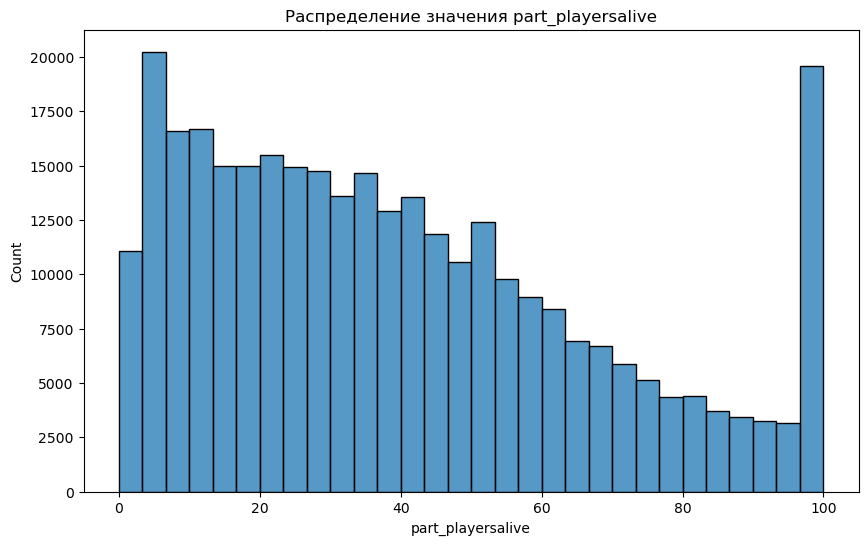

In [375]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='part_playersalive', bins=30)
plt.title('Распределение значения part_playersalive')
plt.show()

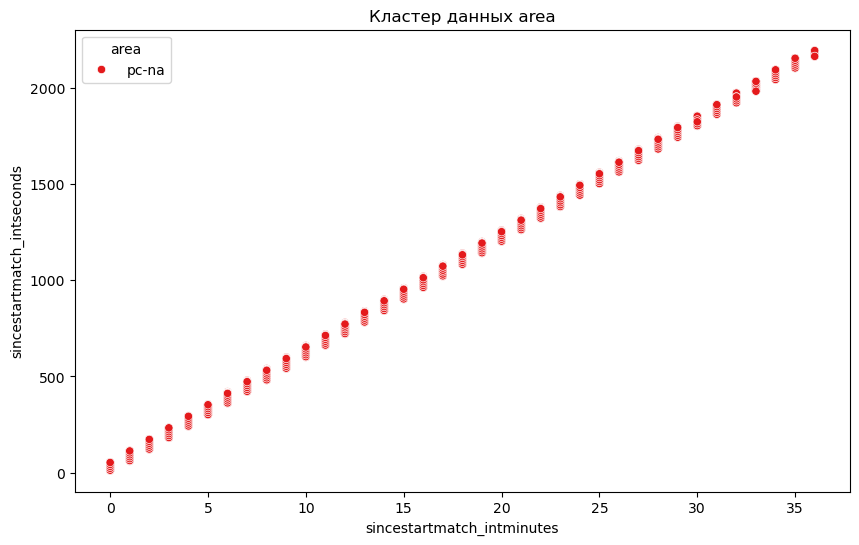

In [382]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sincestartmatch_intminutes', y='sincestartmatch_intseconds', hue='area', palette='Set1')
plt.title('Кластер данных area')
plt.show()

## 7. Выводы к разделу 2

Используя индексацию посмотрели на конкретные данные таблицы, а также на данные по определённому критерию.  
Используя сортировку упорядочили необходимые данные.  
С помощью фильтрации вывели необходимый диапозон данных.  
Сводные таблицы помогли агрегировать данные, структурировать их и сделать нагляднее выводы, что упрощает анализ больших объемов информации.  
Группировка данных дала возможность извлекать статистическую информацию и выявлять тренды.

# Графический анализ данных

## 1. Диаграммы, библиотека Matplotlib

In [443]:
df.dtypes

area                                     object
beforeendmatch_intminutes                 int64
beforeendmatch_intseconds                 int64
beforeendmatch_seconds                    int32
bluezonecustomoptions                    object
cameraviewbehaviour                      object
common_isgame                             int32
completion_match                          int32
dateid                                    int64
duration                                  int64
end_date                                 object
gamestate_elapsedtime                     int64
gamestate_numaliveplayers                 int64
gamestate_numaliveteams                   int64
gamestate_numjoinplayers                  int64
gamestate_numstartplayers                 int64
gamestate_poisongaswarningposition_x    float64
gamestate_poisongaswarningposition_y    float64
gamestate_poisongaswarningposition_z      int64
gamestate_poisongaswarningradius        float64
gamestate_redzoneposition_x             

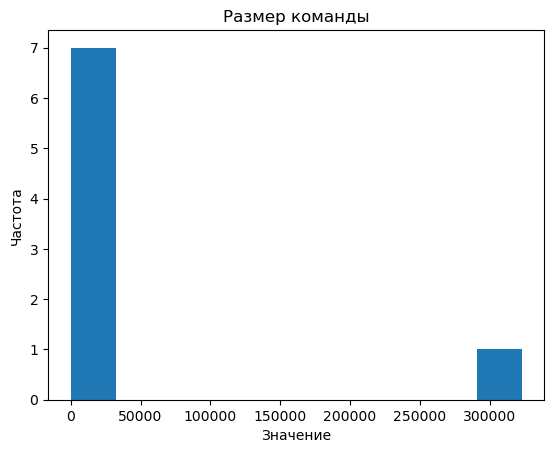

In [455]:
plt.hist(data['teamsize'])
plt.title('Размер команды')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

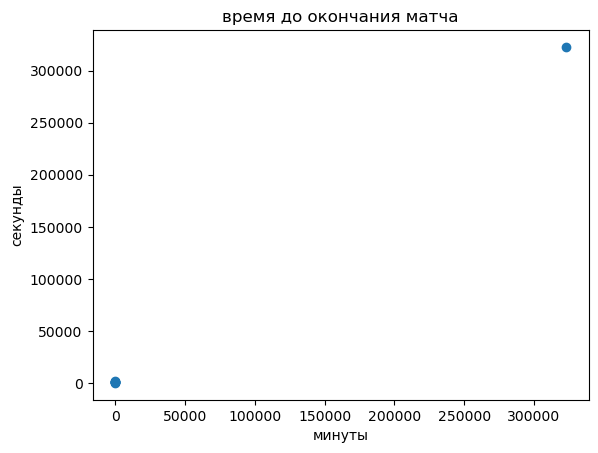

In [451]:
plt.scatter(data['beforeendmatch_intminutes'], data['beforeendmatch_intseconds'])
plt.title('время до окончания матча')
plt.xlabel('минуты')
plt.ylabel('секунды')
plt.show()

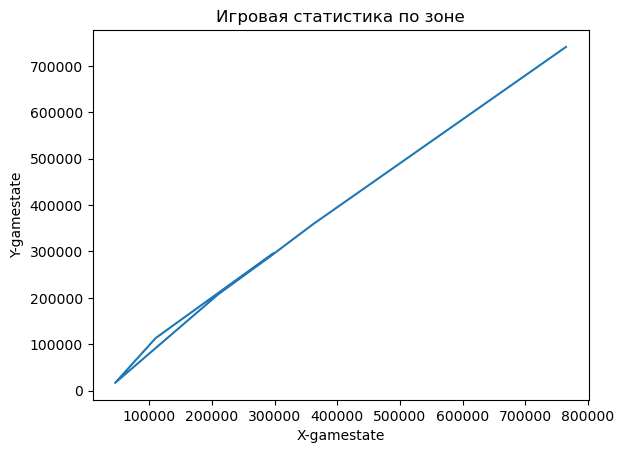

In [457]:
plt.plot(data['gamestate_safetyzoneposition_x'], data['gamestate_safetyzoneposition_y'])
plt.title('Игровая статистика по зоне')
plt.xlabel('X-gamestate')
plt.ylabel('Y-gamestate')
plt.show()

## 2. Диаграммы, библиотека Seaborn

In [460]:
df.dtypes

area                                     object
beforeendmatch_intminutes                 int64
beforeendmatch_intseconds                 int64
beforeendmatch_seconds                    int32
bluezonecustomoptions                    object
cameraviewbehaviour                      object
common_isgame                             int32
completion_match                          int32
dateid                                    int64
duration                                  int64
end_date                                 object
gamestate_elapsedtime                     int64
gamestate_numaliveplayers                 int64
gamestate_numaliveteams                   int64
gamestate_numjoinplayers                  int64
gamestate_numstartplayers                 int64
gamestate_poisongaswarningposition_x    float64
gamestate_poisongaswarningposition_y    float64
gamestate_poisongaswarningposition_z      int64
gamestate_poisongaswarningradius        float64
gamestate_redzoneposition_x             

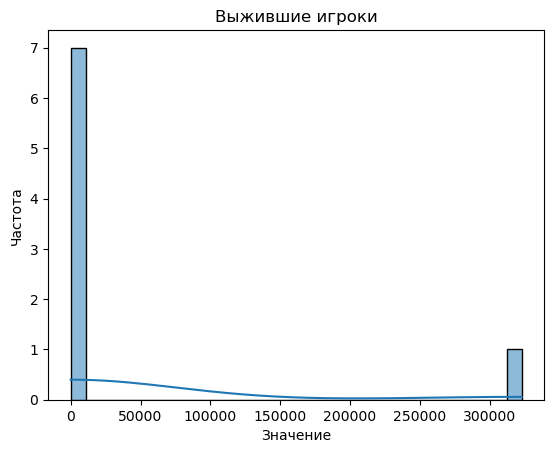

In [464]:
sns.histplot(data['part_playersalive'], bins=30, kde=True)
plt.title('Выжившие игроки')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

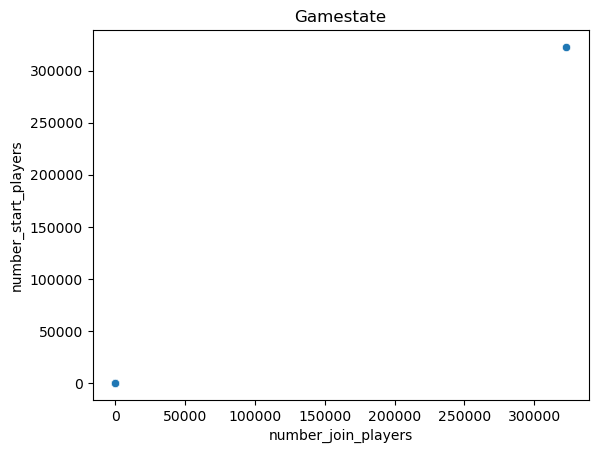

In [469]:
sns.scatterplot(x='gamestate_numjoinplayers', y='gamestate_numstartplayers', data=data)
plt.title('Gamestate')
plt.xlabel('number_join_players')
plt.ylabel('number_start_players')
plt.show()

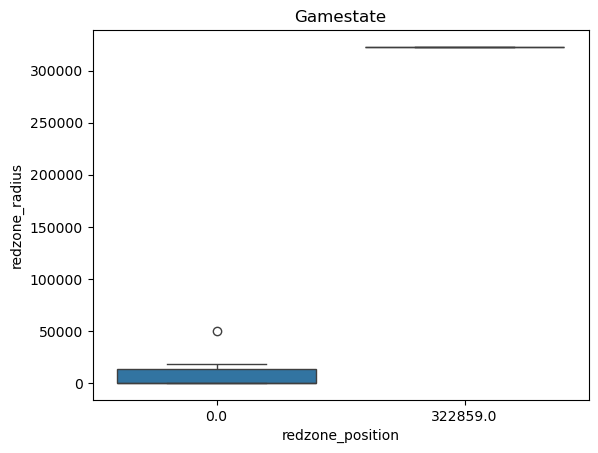

In [473]:
sns.boxplot(x='gamestate_redzoneposition_z', y='gamestate_redzoneradius', data=data)
plt.title('Gamestate')
plt.xlabel('redzone_position')
plt.ylabel('redzone_radius')
plt.show()

## 3. "Портрет" типичного игрока (вывод к разделу 3)

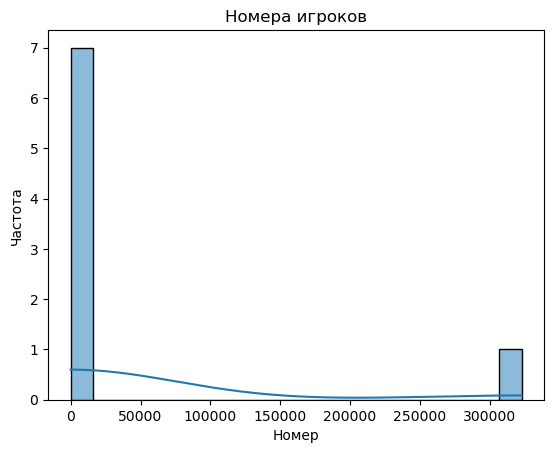

In [510]:
sns.histplot(data['nbr_players'], bins=20, kde=True)
plt.title('Номера игроков')
plt.xlabel('Номер')
plt.ylabel('Частота')
plt.show()

# Общий вывод по проекту

Анализ игровых сессий в PUBG показывает, что игроки активно вовлечены в процесс игры, уделяя серьезное количество времени каждой сессии.  
С учетом высокой продолжительности и частоты игровых сессий, а также результатов, можно сделать вывод о растущем интересе к игре.  
Важно также отметить, что стратегии, используемые игроками, оказывают значительное влияние на их успех и производительность во время игр.